In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
Ic = np.array([0.5,0.6,0.7,0.8,0.9,1.0,1.10,1.20,1.30])
Ia = np.array([[2.56*1e-3,2.34*1e-3,1.7*1e-3,0.47*1e-3,0.41*1e-3,0.12*1e-3,50*1e-6,33*1e-6,25*1e-6],
                 [4.45*1e-3,4.3*1e-3,3.9*1e-3,3.2*1e-3,1.7*1e-3,0.8*1e-3,0.7*1e-3,164*1e-6,100*1e-6],
[6.6*1e-3,6.5*1e-3,6.2*1e-3,5.6*1e-3,4.5*1e-3,2.5*1e-3,1.3*1e-3,1.2*1e-3,0.6*1e-3]])
U = np.array([50,80,110])
N=2102
L=167*1e-3
D=62*1e-3
ra = 6*1e-3
rk = 3*1e-3
dU = 2.5
dIc = 0.05
eps_Ia = 0.01
mu0 = 4*np.pi*1e-7

/Users/sergmiller/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


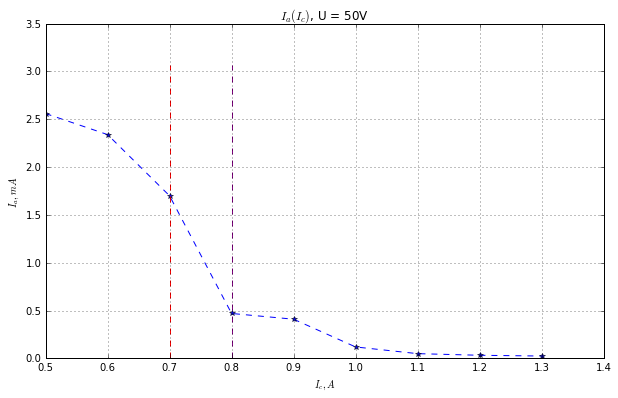

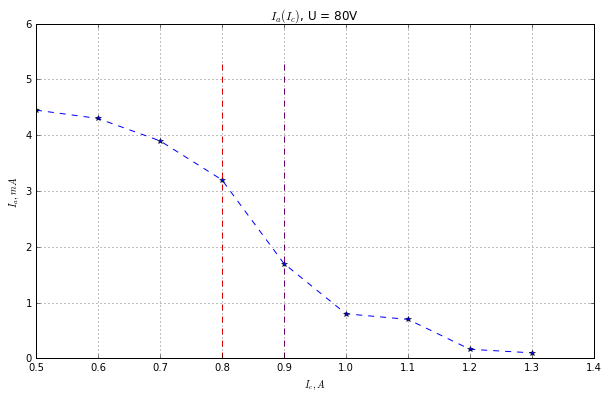

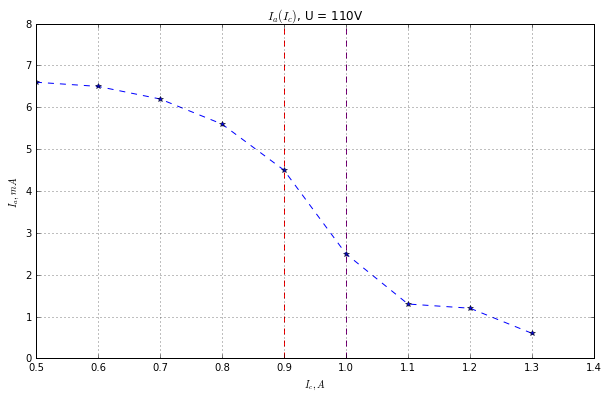

[ 0.75  0.85  0.95] [ 11.1211135   12.60392864  14.08674377] [  1.59712320e+11   1.98949602e+11   2.18996117e+11]
[ 0.07071068  0.07071068  0.07071068] [ 0.0942809   0.08318903  0.07443229]
[  3.01579642e+10   3.31605846e+10   3.26742389e+10]


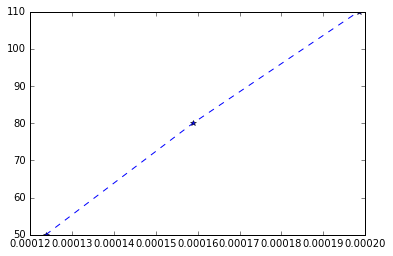

In [77]:
Icr = np.zeros(3)
Em = np.zeros(3)
sI = np.zeros(3)
for i in range(3):
    B = mu0*N*Ic/(L**2 + D**2)**0.5
    cr = np.argmax(np.abs([(Ia[i][j+1] - Ia[i][j])/(Ic[j+1] - Ic[j]) for j in range(len(Ic)-1)]))
    Icr[i] = (Ic[cr] + Ic[cr+1])/2
    sI[i] = (Ic[cr+1] - Ic[cr])/2**0.5
    plt.figure(figsize=(10,6))
#     plt.subplot(211)
    plt.title(r'$I_a(I_c)$, U = ' + str(U[i]) + 'V')
    plt.plot(Ic,Ia[i]*1e3,'*--')
    plt.plot([Ic[cr],Ic[cr]],[0,np.max(Ia[i])*1e3*1.2],'r--')
    plt.plot([Ic[cr+1],Ic[cr+1]],[0,np.max(Ia[i])*1e3*1.2],'--',color='purple')
    plt.grid(True)
    plt.xlabel(r'$I_c, A$')
    plt.ylabel(r'$I_a, mA$')
    plt.legend()
    plt.show()
Bcr = mu0*N*Icr/(L**2 + D**2)**0.5
Em = 8*U/(Bcr**2*ra**2*(1-(rk/ra)**2)**2)
epsEm = (0.01**2 + 4*(sI/Icr)**2)**0.5
print(Icr,Bcr*1e3,Em)
plt.plot(Bcr*Bcr,U,'*--')
print(sI, sI/Icr)
print(epsEm*Em)